In [1]:
# DEBUG

import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import random
import struct
import wave

DATA_PATH = "../data/"
files_csv = [ file for file in os.listdir(DATA_PATH) if file[-4:] == ".csv"]
index = 0
for file_name in files_csv:
    print(index, "\t", file_name)
    index += 1

test = pd.read_csv(DATA_PATH + files_csv[6], sep="\t")

data_l = test["left"]
print(len(data_l))
data_r = test["rigth"]
print(len(data_l))


0 	 08 - no reply.csv
1 	 09 - blue.csv
2 	 05 - don't bother none (tv edit).csv
3 	 meta_sound_data.csv
4 	 02 - what planet is this..csv
5 	 10 - einstein groovin'.csv
6 	 01 - tank! (tv stretch).csv
7 	 07 - mushroom hunting.csv
8 	 11 - pearls.csv
9 	 06 - piano black.csv
10 	 04 - diamonds.csv
11 	 03 - cosmic dare (pretty with a pistol).csv
12 	 12 - gotta knock a little harder.csv
9138814
9138814


In [2]:
def data_2_wav(data, specs, path, verbose=False):
    os.system("touch " + path)
    if verbose:
        print("creating destination file\t" + path)
    
    try:           
        output.close()
    except:
        if verbose:
            print("alocating file")
            
        output = wave.open(path, 'w')
    else:
        output = wave.open(path, 'w')
        if verbose:
            print("file already exists")
    
    if verbose:
            print("setting sound specs")
    
    specs[0] = 1
    specs[3] = len(data)
    
    output.setparams(specs)
    
    if verbose:
        print("formating data...")
        
    _carry = []
    for ii in list(data):
        _carry.append(struct.pack('<h', ii))

    _carry = b''.join(_carry)
    
    if verbose:
            print("writing...")
    
    output.writeframes(_carry)
    
    output.close()
    
    if verbose:
        print("DONE")

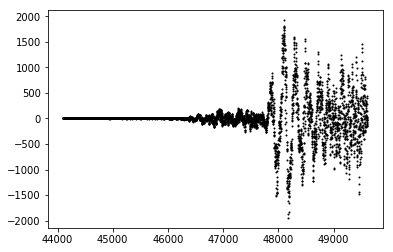

In [3]:
data_test = data_l[44100 :44100 * 6]

plt.plot(data_test[0:int(44100*(1/(2**3)))] , 'ko', markersize=1)
plt.show()

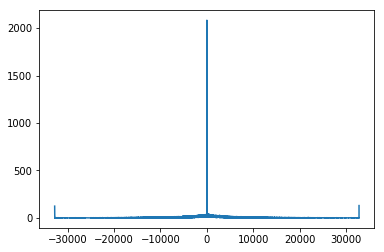

In [4]:
histo = np.histogram(data_test, bins=range(-2**15, 2**15 + 1))
plt.plot( histo[1][:-1], histo[0])
plt.show()

In [19]:
def random_noise(data, error_rate):
    worth = [ i % (2 * random.random()) for i in range(int(100/error_rate))]

    [fail, change] = [0, 0]

    for index  in range(len(data)):
        if not random.choice(worth):
            data[index] = np.int32( data[index] * random.random() )
                
            change += 1
        else:
            fail += 1
            
    
    print("Not Changed" ,fail / len(data), "Changed", change / len(data) )
    
    return data

noice_data = random_noise(list(data_test), 30)

Not Changed 0.6662448979591836 Changed 0.3337551020408163


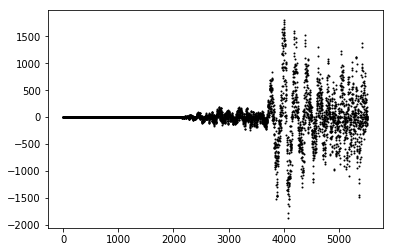

In [16]:
plt.plot(noice_data[0:int(44100*(1/(2**3)))] , 'ko', markersize=1)
plt.show()

In [17]:
relative_index = 0
for val in data_test:
    if val != noice_data[relative_index]:
        print("DIFERENT!", relative_index)
        break
    else:
        pass
    relative_index += 1
        

DIFERENT! 828


In [18]:
specs = [1, 2, 44100 , 9138814,	"NONE"	, "notcompressed"]

data_2_wav(noice_data, specs, DATA_PATH + "random_noice.wav", verbose=True)

creating destination file	../data/random_noice.wav
alocating file
setting sound specs
formating data...
writing...
DONE
